In [1]:
import numpy as np
import pandas as pd
from Freezer import getMyPosition as getPosition
import seaborn as sns
import matplotlib.pyplot as plt

nInst = 0
nt = 0

# Commission rate
commRate = 0.0025 # was 0.0050

# Dollar position limit (maximum absolute dollar value of any individual stock position)
dlrPosLimit = 10000

timeOut=600 

pricesFile="./prices.txt"
prcAll = df=pd.read_csv(pricesFile, sep='\s+', header=None, index_col=None)

In [2]:
y_s = [i for i in range(250)]
prcNormalized = pd.DataFrame()
for i in range(100):
    prcNormalized[i] = prcAll[i]
prcNormalized


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,40.44,4.90,30.92,18.51,47.69,61.70,54.07,18.65,44.13,49.39,...,52.30,38.38,54.80,28.49,31.98,63.15,51.62,11.12,33.32,41.10
1,40.58,4.88,30.95,18.41,47.55,61.38,54.10,18.71,43.97,49.29,...,52.48,38.37,54.78,28.40,32.18,63.15,51.69,11.15,33.35,41.35
2,40.52,4.90,31.02,18.37,47.70,62.10,54.15,18.63,44.13,49.61,...,52.08,38.40,54.82,28.33,32.04,63.16,51.68,11.16,33.31,41.82
3,40.47,4.92,30.98,18.42,47.66,62.70,54.16,18.51,44.22,49.53,...,52.13,38.41,54.83,28.28,31.70,63.19,51.74,11.14,33.70,41.86
4,40.23,4.91,30.93,18.39,48.09,63.06,54.20,18.62,44.55,49.57,...,52.76,38.39,54.80,28.48,31.59,63.19,51.81,11.14,33.76,41.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,43.80,4.13,28.54,17.95,47.41,56.23,52.21,13.96,41.87,49.42,...,48.26,37.11,53.10,26.29,26.27,61.66,50.22,9.81,33.94,38.33
246,43.87,4.13,28.56,17.96,47.11,56.81,52.22,13.81,41.94,49.35,...,48.21,37.14,53.08,26.24,25.97,61.67,50.26,9.81,34.06,38.35
247,43.66,4.14,28.59,18.05,47.13,57.05,52.28,13.84,41.73,49.24,...,48.62,37.14,53.11,26.07,25.74,61.67,50.29,9.82,33.86,38.07
248,43.61,4.14,28.64,18.06,46.72,56.97,52.39,13.86,41.70,49.28,...,48.32,37.17,53.16,26.00,25.96,61.69,50.32,9.81,34.06,39.07


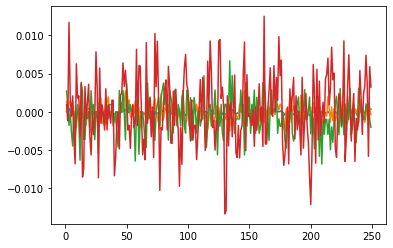

In [117]:
for i in range(95,99):
    x_s = prcNormalized[i]
    plt.plot(y_s, x_s)

In [3]:
corr = pd.DataFrame()
minCorr = 1
minPair = (0,0)
for i in range(100):
    newCorr = []
    for j in range(100):
        curCorr = prcNormalized[i].corr(prcNormalized[j])
        if abs(curCorr) < minCorr:
            minCorr = abs(curCorr)
            minPair = (i,j)
        newCorr.append(curCorr)
corr = prcNormalized.corr()
minPair

(19, 82)

In [5]:
VAT = []
mapping = {}
start = 0
I, J = set(), set()
for i in range(100):
    J.add(i)
J.remove(start)
I.add(start)
VAT.append(start)
mapping[0] = start
for i in range(1,100):
    maxCorr = 0
    maxPoint = 0
    for p1 in I:
        for p2 in J:
            if abs(corr[p1][p2]) > maxCorr:
                maxCorr = abs(corr[p1][p2])
                maxPoint = p2
    J.remove(maxPoint)
    I.add(maxPoint)
    VAT.append(maxPoint)
    mapping[i] = maxPoint
clusteredCorr = pd.DataFrame()
for i in range(100):
    newCorr = []
    for j in range(100):
        newCorr.append(abs(corr[VAT[i]][VAT[j]]))
    clusteredCorr[i] = pd.Series(newCorr)




<AxesSubplot:>

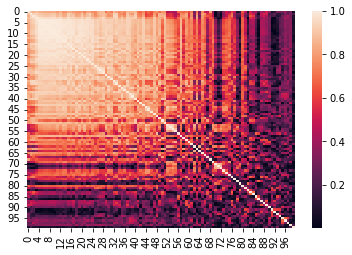

In [7]:
sns.heatmap(clusteredCorr)


<AxesSubplot:>

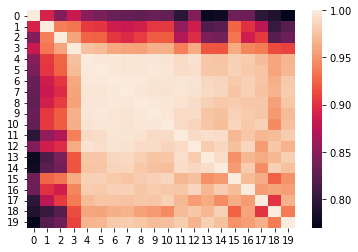

In [9]:
sns.heatmap(clusteredCorr.iloc[0:20, 0:20])

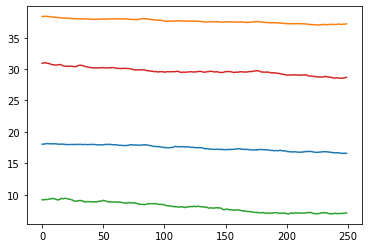

In [13]:
for i in range(15,19):
    x_s = prcNormalized[mapping[i]]
    plt.plot(y_s, x_s)

In [155]:
threshold = 0.5
clusters = []
curPoint = 0
J = set()
for i in range(100):
    J.add(i)
curCluster = set()
while len(J) > 0:
    maxCorr = 0
    maxPoint = 0
    for p1 in curCluster:
        for p2 in J:
            if abs(corr[p1][p2]) > maxCorr:
                maxCorr = abs(corr[p1][p2])
                maxPoint = p2
    J.remove(maxPoint)
    newClust= False
    for p1 in curCluster:
        if abs(corr[p1][maxPoint]) < threshold:
            clusters.append(curCluster)
            curCluster = set()
            curCluster.add(maxPoint)
            newClust= True
            break
    if not newClust:
        curCluster.add(maxPoint)
clusters.append(curCluster)
clusters

[{0},
 {1},
 {98},
 {83},
 {6, 60, 76, 95},
 {91},
 {92},
 {2},
 {36},
 {39},
 {96},
 {48},
 {57},
 {54},
 {40},
 {26},
 {88},
 {20},
 {97},
 {8},
 {68},
 {17},
 {33},
 {4},
 {37},
 {74},
 {58},
 {22},
 {12},
 {79},
 {34},
 {73},
 {51},
 {56},
 {31},
 {38},
 {11},
 {32},
 {81},
 {89},
 {70},
 {53},
 {86},
 {7},
 {3},
 {75},
 {77},
 {15},
 {9},
 {27},
 {93},
 {66},
 {62},
 {78},
 {99},
 {14},
 {45},
 {94},
 {50},
 {69},
 {84},
 {28},
 {35},
 {55},
 {80},
 {82},
 {64},
 {29},
 {19},
 {42},
 {52},
 {44},
 {10},
 {65},
 {63},
 {13},
 {21},
 {71},
 {85},
 {46},
 {24},
 {87},
 {67},
 {25},
 {49},
 {5},
 {43},
 {18},
 {90},
 {16},
 {72},
 {59},
 {30},
 {23},
 {47},
 {41},
 {61}]

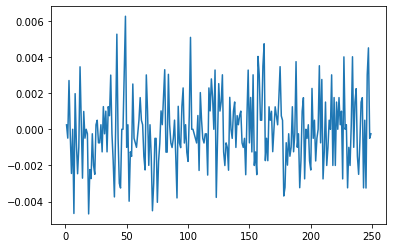

In [153]:
for i in clusters[3]:
    x_s = prcNormalized[i]
    plt.plot(y_s, x_s)

In [165]:
for i in range(100):
    curSeries = corr[i]
    highCorr = curSeries[abs(curSeries) > 0.6][curSeries != 1]
    if len(highCorr) > 0:
        print(highCorr)

76    0.666119
Name: 6, dtype: float64
76    0.664395
95    0.620011
Name: 60, dtype: float64
6     0.666119
60    0.664395
91    0.655451
92    0.623985
95    0.805640
Name: 76, dtype: float64
76    0.655451
95    0.626046
Name: 91, dtype: float64
76    0.623985
Name: 92, dtype: float64
60    0.620011
76    0.805640
91    0.626046
Name: 95, dtype: float64


In [196]:
leaders = {}
for i in range(100):
    leaders[i] = []
for i in range(100):
    curStock = prcNormalized[i]
    for j in range(100):
        curComp = prcNormalized[j]
        if j == i:
            continue
        for k in range(-15,15):
            curCor = curStock.corr(curComp.shift(k))
            if curCor > 0.4 or curCor < -0.4:
                leaders[j].append((curCor, i, k))
leaders
        


{0: [],
 1: [],
 2: [(0.5014387316674045, 76, 0),
  (0.40324733413561537, 91, 0),
  (0.46804560458169786, 95, 0)],
 3: [],
 4: [],
 5: [],
 6: [(0.5143175387404763, 60, 0),
  (0.6661187271393013, 76, 0),
  (0.44172850346020703, 91, 0),
  (0.5294470122059116, 92, 0),
  (0.5931283411569643, 95, 0)],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [(0.4082883758328563, 76, 0)],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [(0.5143175387404763, 6, 0),
  (0.6643945007602847, 76, 0),
  (0.46100519070738977, 91, 0),
  (0.505379042972425, 92, 0),
  (0.6200106939540685, 95, 0),
  (0.4155015252869519, 95, 1)],
 61: [],
 

In [195]:
prcNormalized[76].corr(prcNormalized[95].shift(-1))


0.46744258850030934